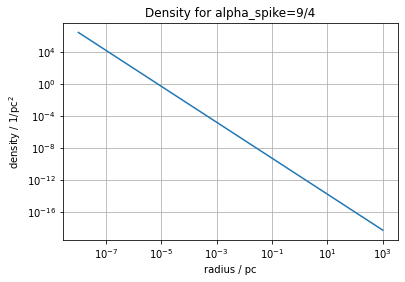

In [2]:
from imripy import * 

# Dark matter spike with alpha=9/4 for Primordial black holes case
r_spike = 0.54  # in parsecs

alpha = 9/4

rho_spike = 226. * solar_mass_to_pc  # This takes the value of 226 M_sun/pc^3 and converts it to 1/pc^2

spike = Spike(rho_spike, r_spike, alpha)




# Plot density
r_grid = np.geomspace(1e-8, 1e3, 100)  # creates a grid in pc
plt.loglog(r_grid, spike.density(r_grid), label='spike')
plt.grid()
plt.xlabel("radius / pc")
plt.ylabel("density / 1/pc$^2$")
plt.title('Density for alpha_spike=9/4')
plt.show()


In [3]:
# Definition of the binary system 

m1 =  1 * solar_mass_to_pc   # The central mass m1 with a mass of 1 solar masses, converted to pc

m2 = 1e-3 * solar_mass_to_pc   # The secondary mass of 1e-3 solar mass converted to pc

D_luminosity = 5e8              # The distance to the system from earth as 500 Mpc

sp = SystemProp(m1, m2, spike, D_luminosity)   # Create the SystemProp object describing the IMRI system


In [6]:
# Setting initial and the final conditions of the binary evolution for an eccentric orbit

a0 = 50. * sp.r_isco()  
e0 = 0.999    

a_fin = sp.r_isco() 

R_fin = sp.r_isco()      # The final condition for the evolution

In [12]:
# Solving the differential equation of the binary evolution

ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0, e_0=e0,  a_fin = R_fin)

NameError: name 'imripy' is not defined